In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [77]:
raw_df = pd.read_csv('train_ctrUa4K.csv')
raw_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [114]:
df = raw_df.copy()

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [116]:
df.Gender.fillna(df.Gender.mode()[0],inplace = True)
df.Married.fillna(df.Married.mode()[0],inplace = True)
df.Dependents.fillna(df.Dependents.mode()[0],inplace = True)
df.Self_Employed.fillna(df.Self_Employed.mode()[0],inplace = True)
df.LoanAmount.fillna(df.LoanAmount.mean(),inplace = True)
df.Loan_Amount_Term.fillna(df.Loan_Amount_Term.mode()[0],inplace = True)
df.Credit_History.fillna(df.Credit_History.mode()[0],inplace = True)

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               614 non-null object
Married              614 non-null object
Dependents           614 non-null object
Education            614 non-null object
Self_Employed        614 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [118]:
df.Gender.value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

In [119]:
df.Gender = df.Gender.map({'Male':0,'Female':1})

In [120]:
df.Married.value_counts()

Yes    401
No     213
Name: Married, dtype: int64

In [121]:
df.Married = df.Married.map({'Yes':1,'No':0})

In [122]:
df.Dependents.value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [123]:
df.Dependents = df.Dependents.map({'0':0,'1':1,'2':2,'3+':3})

In [124]:
df.Education.value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [125]:
df.Education = df.Education.map({'Graduate':1,'Not Graduate':0})

In [126]:
df.Self_Employed.value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

In [127]:
df.Self_Employed = df.Self_Employed.map({'No':0,'Yes':1})

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               614 non-null int64
Married              614 non-null int64
Dependents           614 non-null int64
Education            614 non-null int64
Self_Employed        614 non-null int64
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(6), object(3)
memory usage: 62.4+ KB


In [129]:
df.Property_Area.value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [130]:
df.Property_Area = df.Property_Area.map({'Semiurban':0,
                                        'Urban':1,
                                        'Rural':2})

In [131]:
df.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [132]:
df.Loan_Status = df.Loan_Status.map({'Y':1,'N':0})

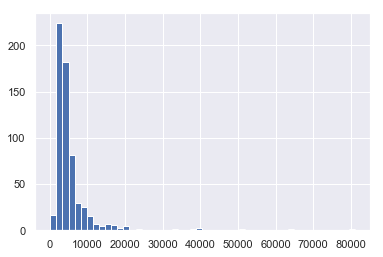

In [133]:
df.ApplicantIncome.hist(bins = 50)

In [134]:
df['Income'] = df.ApplicantIncome + df.CoapplicantIncome

In [135]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income
0,LP001002,0,0,0,1,0,5849,0.0,146.412162,360.0,1.0,1,1,5849.0
1,LP001003,0,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,2,0,6091.0
2,LP001005,0,1,0,1,1,3000,0.0,66.000000,360.0,1.0,1,1,3000.0
3,LP001006,0,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,1,1,4941.0
4,LP001008,0,0,0,1,0,6000,0.0,141.000000,360.0,1.0,1,1,6000.0


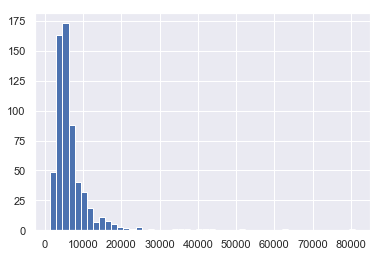

In [136]:
df.Income.hist(bins = 50)

In [137]:
df['LogIncome'] = np.log(df.Income)

In [138]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income,LogIncome
0,LP001002,0,0,0,1,0,5849,0.0,146.412162,360.0,1.0,1,1,5849.0,8.674026
1,LP001003,0,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,2,0,6091.0,8.714568
2,LP001005,0,1,0,1,1,3000,0.0,66.000000,360.0,1.0,1,1,3000.0,8.006368
3,LP001006,0,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,1,1,4941.0,8.505323
4,LP001008,0,0,0,1,0,6000,0.0,141.000000,360.0,1.0,1,1,6000.0,8.699515


In [139]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection  import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

In [140]:
df.columns.values

array(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area', 'Loan_Status', 'Income', 'LogIncome'],
      dtype=object)

In [141]:
X_train = df[['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'LogIncome',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area']]
Y_train = df['Loan_Status']

In [142]:
X_train.shape

(614, 10)

In [143]:
Y_train.shape

(614,)

In [144]:
model = LogisticRegression()
model.fit(X_train,Y_train)

C:\Users\rohan\Anaconda3\envs\rohanenv\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [145]:
predictions = model.predict(X_train)

In [146]:
accuracy = metrics.accuracy_score(predictions,Y_train)
print ("Accuracy : %s" % "{0:.3%}".format(accuracy))

Accuracy : 80.945%


In [147]:
df.to_csv('Preprocessed_dataset.csv')